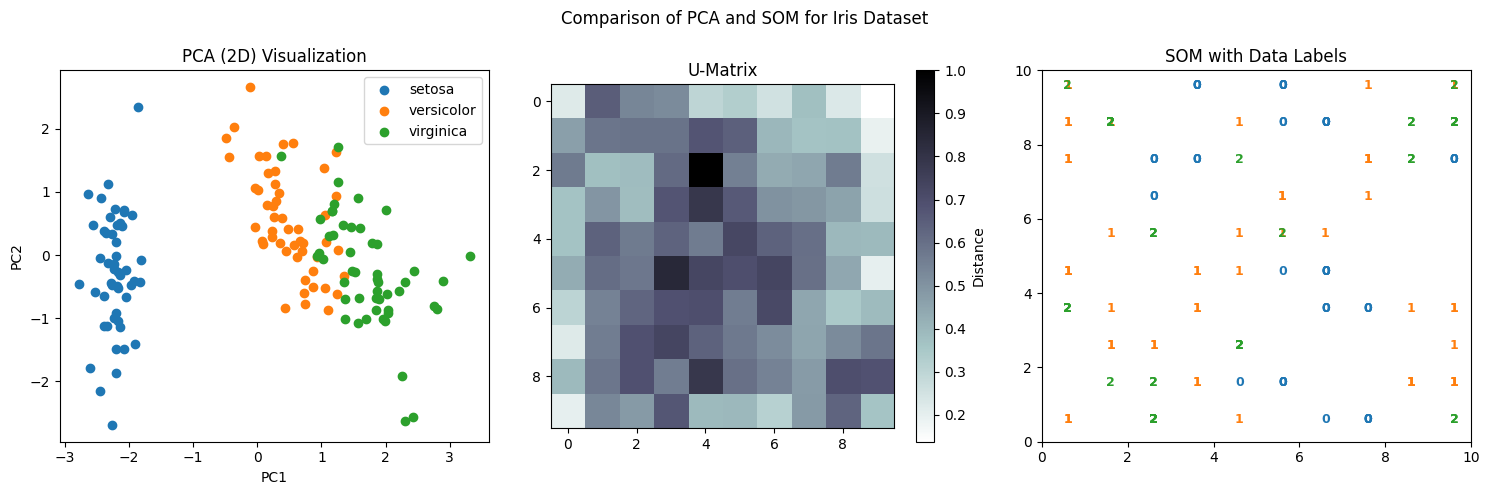

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from minisom import MiniSom  # install using pip install minisom

# 1. Load and preprocess the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
labels = iris.target_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA manually (reduce to 2D)
def manual_pca(X, n_components=2):
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]
    selected_vectors = eigenvectors[:, :n_components]
    return np.dot(X_centered, selected_vectors)

X_pca = manual_pca(X_scaled)

# 3. Apply MiniSom for dimensionality reduction & clustering
som_dim = 10
som = MiniSom(x=som_dim, y=som_dim, input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)
som.train_random(X_scaled, num_iteration=100)

# Create a U-Matrix (distance map) for SOM
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
for i in np.unique(y):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=labels[i])
plt.title("PCA (2D) Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

plt.subplot(1, 3, 2)
plt.title("SOM U-Matrix (Distance Map)")
u_matrix = som.distance_map()
plt.imshow(u_matrix.T, cmap='bone_r')
plt.colorbar(label='Distance')
plt.title("U-Matrix")

plt.subplot(1, 3, 3)
for i, x in enumerate(X_scaled):
    win = som.winner(x)
    plt.text(win[0] + 0.5, win[1] + 0.5, str(y[i]),
             color=plt.cm.tab10(y[i]), fontdict={'weight': 'bold', 'size': 9})
plt.xlim([0, som_dim])
plt.ylim([0, som_dim])
plt.title("SOM with Data Labels")

plt.suptitle("Comparison of PCA and SOM for Iris Dataset")
plt.tight_layout()
plt.show()


In [2]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=ccc5339dd5a016a72c04f321b8714cf4e0aabe9da93c4f71d6c767759b548ff8
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom
